Lucas Cassin Cruz Burke, April 28, 2023
# AMATH 563 Homework 2

In [32]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [2]:
# Loading MNIST dataset
train = pd.read_csv('./MNIST/mnist_train.csv')
test = pd.read_csv('./MNIST/mnist_test.csv')

### Reducing input dimension with PCA

In [15]:
# Standardizing the data 
# Split the data into features and target (labels)
features_train = train.iloc[:, 1:]
labels_train = train.iloc[:, 0]
features_test = test.iloc[:, 1:]
labels_test = test.iloc[:, 0]

# Standardize the features
scaler = StandardScaler()
features_train = scaler.fit_transform(features_train)
features_test = scaler.transform(features_test)


In [16]:
# Applying PCA
pca = PCA(n_components=2)
principalComponents_train = pca.fit_transform(features_train)
principalComponents_test = pca.transform(features_test)

# Convert to DataFrame
principalDf_train = pd.DataFrame(data = principalComponents_train, columns = ['principal component 1', 'principal component 2'])
principalDf_test = pd.DataFrame(data = principalComponents_test, columns = ['principal component 1', 'principal component 2'])


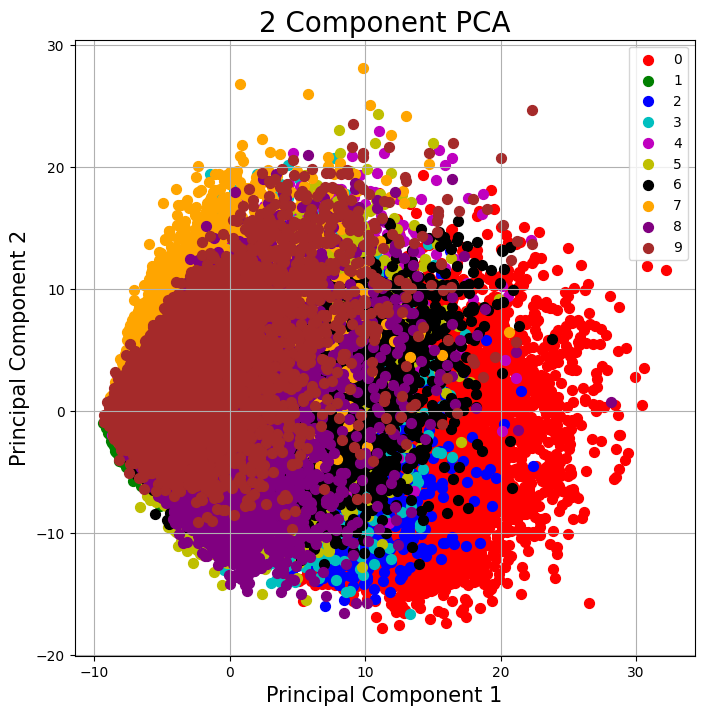

In [17]:
# Visualizing results 
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 Component PCA', fontsize = 20)

targets = list(range(10))  # assuming the labels are integers from 0 to 9
colors = ['r', 'g', 'b', 'c', 'm', 'y', 'k', 'orange', 'purple', 'brown']

for target, color in zip(targets, colors):
    indicesToKeep = labels_train == target
    ax.scatter(principalDf_train.loc[indicesToKeep, 'principal component 1']
               , principalDf_train.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)

ax.legend(targets)
ax.grid()


In [18]:
# How many modes are needed to preserve 95% of the variance in the training set?
pca_95 = PCA(0.95)  # 0.95 is the explained variance we want to preserve
features_train_transformed_95 = pca_95.fit_transform(features_train)

print("Number of components for 95% variance: ", pca_95.n_components_)

Number of components for 95% variance:  331


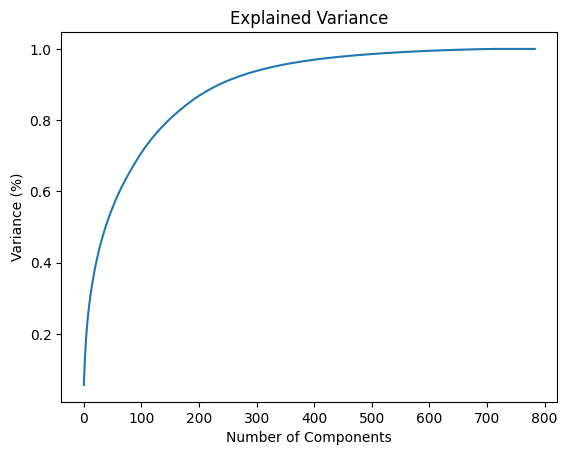

In [19]:
pca = PCA().fit(features_train)

plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)')
plt.title('Explained Variance')
plt.show()

### 1 vs. 9 digit classifier 

In [87]:
# Extracting digits 1 & 9
train_1_9 = train[(train.iloc[:, 0] == 1) | (train.iloc[:, 0] == 9)]
test_1_9 = test[(test.iloc[:, 0] == 1) | (test.iloc[:, 0] == 9)]

In [88]:
# Standardizing the data
features_train_1_9 = train_1_9.iloc[:, 1:]
labels_train_1_9 = train_1_9.iloc[:, 0].replace({1:-1, 9:1})
features_test_1_9 = test_1_9.iloc[:, 1:]
labels_test_1_9 = test_1_9.iloc[:, 0].replace({1:-1, 9:1})

# Standardize the features
scaler = StandardScaler()
features_train_1_9 = scaler.fit_transform(features_train_1_9)
features_test_1_9 = scaler.transform(features_test_1_9)

In [89]:
# Applying PCA
pca = PCA(n_components=0.95)
features_train_pca = pca.fit_transform(features_train_1_9)
features_test_pca = pca.transform(features_test_1_9)

In [90]:
# Preparing for kernel regression
from sklearn.kernel_ridge import KernelRidge
from sklearn.model_selection import GridSearchCV

parameters_rbf = {'alpha': [0.1, 0.5, 1], 'gamma': [0.001, 0.01, 0.1, 1]}
parameters_poly = {'alpha': [0.1, 0.5, 1], 'degree': [2, 3, 4]}
parameters_linear = {'alpha': [0.1, 0.5, 1]}

In [91]:
kernels = ['rbf', 'poly', 'linear']
parameters = [parameters_rbf, parameters_poly, parameters_linear]

for kernel, parameter in zip(kernels, parameters):
    kr = GridSearchCV(KernelRidge(kernel=kernel), parameter, cv=5)
    kr.fit(features_train_pca, labels_train_1_9)
    
    # Display the best parameters
    print(f"Best parameters for {kernel}: ", kr.best_params_)
    
    train_preds = kr.predict(features_train_pca)
    test_preds = kr.predict(features_test_pca)

    # Here we classify as '1' if the output is negative and '9' if its positive
    train_preds_class = np.where(train_preds < 0, -1, 1)
    test_preds_class = np.where(test_preds < 0, -1, 1)

    train_error = np.mean(train_preds_class != labels_train_1_9)
    test_error = np.mean(test_preds_class != labels_test_1_9)

    print(f"Training error for {kernel}: ", train_error)
    print(f"Test error for {kernel}: ", test_error)

Best parameters for rbf:  {'alpha': 0.1, 'gamma': 0.001}
Training error for rbf:  0.0007091639744700969
Test error for rbf:  0.004197761194029851
Best parameters for poly:  {'alpha': 1, 'degree': 2}
Training error for poly:  0.0007091639744700969
Test error for poly:  0.004197761194029851
Best parameters for linear:  {'alpha': 1}
Training error for linear:  0.004018595855330549
Test error for linear:  0.006996268656716418


Current best test errors:
- RBF: 0.004197761194029851
- Poly: 0.004197761194029851
- Linear: 0.006996268656716418

### 3 vs. 8 digit classifier

In [79]:
# Extracting digits 3 & 8
train_3_8 = train[(train.iloc[:, 0] == 3) | (train.iloc[:, 0] == 8)]
test_3_8 = test[(test.iloc[:, 0] == 3) | (test.iloc[:, 0] == 8)]

In [92]:
# Standardizing the data
features_train_3_8 = train_3_8.iloc[:, 1:]
labels_train_3_8 = train_3_8.iloc[:, 0].replace({3:-1, 8:1})
features_test_3_8 = test_3_8.iloc[:, 1:]
labels_test_3_8 = test_3_8.iloc[:, 0].replace({3:-1, 8:1})

# Standardize the features
scaler = StandardScaler()
features_train_3_8 = scaler.fit_transform(features_train_3_8)
features_test_3_8 = scaler.transform(features_test_3_8)

In [93]:
# Applying PCA
pca = PCA(n_components=0.95)
features_train_pca = pca.fit_transform(features_train_3_8)
features_test_pca = pca.transform(features_test_3_8)

In [94]:
# Preparing for kernel regression
from sklearn.kernel_ridge import KernelRidge
from sklearn.model_selection import GridSearchCV

parameters_rbf = {'alpha': [0.1, 0.5, 1], 'gamma': [0.001, 0.01, 0.1, 1]}
parameters_poly = {'alpha': [0.1, 0.5, 1], 'degree': [2, 3, 4]}
parameters_linear = {'alpha': [0.1, 0.5, 1]}

In [95]:
kernels = ['rbf', 'poly', 'linear']
parameters = [parameters_rbf, parameters_poly, parameters_linear]

for kernel, parameter in zip(kernels, parameters):
    kr = GridSearchCV(KernelRidge(kernel=kernel), parameter, cv=5)
    kr.fit(features_train_pca, labels_train_3_8)
    
    # Display the best parameters
    print(f"Best parameters for {kernel}: ", kr.best_params_)
    
    train_preds = kr.predict(features_train_pca)
    test_preds = kr.predict(features_test_pca)

    # Here we classify as '3' if the output is negative and '8' if its positive
    train_preds_class = np.where(train_preds < 0, -1, 1)
    test_preds_class = np.where(test_preds < 0, -1, 1)

    train_error = np.mean(train_preds_class != labels_train_3_8)
    test_error = np.mean(test_preds_class != labels_test_3_8)

    print(f"Training error for {kernel}: ", train_error)
    print(f"Test error for {kernel}: ", test_error)

Best parameters for rbf:  {'alpha': 0.1, 'gamma': 0.001}
Training error for rbf:  0.0008345852111500584
Test error for rbf:  0.007056451612903226
Best parameters for poly:  {'alpha': 1, 'degree': 3}
Training error for poly:  0.0
Test error for poly:  0.003528225806451613
Best parameters for linear:  {'alpha': 1}
Training error for linear:  0.03563678851610749
Test error for linear:  0.04032258064516129


Current best test errors:
- RBF: 0.0008345852111500584
- Poly: 0.003528225806451613
- Linear: 0.04032258064516129

### 1 vs. 7 digit classifier

In [97]:
# Extracting digits 3 & 8
train_1_7 = train[(train.iloc[:, 0] == 1) | (train.iloc[:, 0] == 7)]
test_1_7 = test[(test.iloc[:, 0] == 1) | (test.iloc[:, 0] == 7)]

In [98]:
# Standardizing the data
features_train_1_7 = train_1_7.iloc[:, 1:]
labels_train_1_7 = train_1_7.iloc[:, 0].replace({1:-1, 7:1})
features_test_1_7 = test_1_7.iloc[:, 1:]
labels_test_1_7 = test_1_7.iloc[:, 0].replace({1:-1, 7:1})

# Standardize the features
scaler = StandardScaler()
features_train_1_7 = scaler.fit_transform(features_train_1_7)
features_test_1_7 = scaler.transform(features_test_1_7)

In [99]:
# Applying PCA
pca = PCA(n_components=0.95)
features_train_pca = pca.fit_transform(features_train_1_7)
features_test_pca = pca.transform(features_test_1_7)

In [100]:
# Preparing for kernel regression
from sklearn.kernel_ridge import KernelRidge
from sklearn.model_selection import GridSearchCV

parameters_rbf = {'alpha': [0.1, 0.5, 1], 'gamma': [0.001, 0.01, 0.1, 1]}
parameters_poly = {'alpha': [0.1, 0.5, 1], 'degree': [2, 3, 4]}
parameters_linear = {'alpha': [0.1, 0.5, 1]}

In [101]:
kernels = ['rbf', 'poly', 'linear']
parameters = [parameters_rbf, parameters_poly, parameters_linear]

for kernel, parameter in zip(kernels, parameters):
    kr = GridSearchCV(KernelRidge(kernel=kernel), parameter, cv=5)
    kr.fit(features_train_pca, labels_train_1_7)
    
    # Display the best parameters
    print(f"Best parameters for {kernel}: ", kr.best_params_)
    
    train_preds = kr.predict(features_train_pca)
    test_preds = kr.predict(features_test_pca)

    # Here we classify as '1' if the output is negative and '7' if its positive
    train_preds_class = np.where(train_preds < 0, -1, 1)
    test_preds_class = np.where(test_preds < 0, -1, 1)

    train_error = np.mean(train_preds_class != labels_train_1_7)
    test_error = np.mean(test_preds_class != labels_test_1_7)

    print(f"Training error for {kernel}: ", train_error)
    print(f"Test error for {kernel}: ", test_error)

Best parameters for rbf:  {'alpha': 0.1, 'gamma': 0.001}
Training error for rbf:  0.0011532251864380717
Test error for rbf:  0.004623208506703652
Best parameters for poly:  {'alpha': 1, 'degree': 2}
Training error for poly:  0.001537633581917429
Test error for poly:  0.006934812760055479
Best parameters for linear:  {'alpha': 1}
Training error for linear:  0.006611824402244945
Test error for linear:  0.0106333795654184


### 2 vs. 5 digit classifier

In [102]:
# Extracting digits 2 & 5
train_2_5 = train[(train.iloc[:, 0] == 2) | (train.iloc[:, 0] == 5)]
test_2_5 = test[(test.iloc[:, 0] == 2) | (test.iloc[:, 0] == 5)]

In [103]:
# Standardizing the data
features_train_2_5 = train_2_5.iloc[:, 1:]
labels_train_2_5 = train_2_5.iloc[:, 0].replace({2:-1, 5:1})
features_test_2_5 = test_2_5.iloc[:, 1:]
labels_test_2_5 = test_2_5.iloc[:, 0].replace({2:-1, 5:1})

# Standardize the features
scaler = StandardScaler()
features_train_2_5 = scaler.fit_transform(features_train_2_5)
features_test_2_5 = scaler.transform(features_test_2_5)

In [104]:
# Applying PCA
pca = PCA(n_components=0.95)
features_train_pca = pca.fit_transform(features_train_2_5)
features_test_pca = pca.transform(features_test_2_5)

In [105]:
# Preparing for kernel regression
from sklearn.kernel_ridge import KernelRidge
from sklearn.model_selection import GridSearchCV

parameters_rbf = {'alpha': [0.1, 0.5, 1], 'gamma': [0.001, 0.01, 0.1, 1]}
parameters_poly = {'alpha': [0.1, 0.5, 1], 'degree': [2, 3, 4]}
parameters_linear = {'alpha': [0.1, 0.5, 1]}

In [106]:
kernels = ['rbf', 'poly', 'linear']
parameters = [parameters_rbf, parameters_poly, parameters_linear]

for kernel, parameter in zip(kernels, parameters):
    kr_2_5 = GridSearchCV(KernelRidge(kernel=kernel), parameter, cv=5)
    kr_2_5.fit(features_train_pca, labels_train_2_5)
    
    # Display the best parameters
    print(f"Best parameters for {kernel}: ", kr_2_5.best_params_)
    
    train_preds = kr_2_5.predict(features_train_pca)
    test_preds = kr_2_5.predict(features_test_pca)

    # Here we classify as '2' if the output is negative and '5' if its positive
    train_preds_class = np.where(train_preds < 0, -1, 1)
    test_preds_class = np.where(test_preds < 0, -1, 1)

    train_error = np.mean(train_preds_class != labels_train_2_5)
    test_error = np.mean(test_preds_class != labels_test_2_5)

    print(f"Training error for {kernel}: ", train_error)
    print(f"Test error for {kernel}: ", test_error)

Best parameters for rbf:  {'alpha': 0.1, 'gamma': 0.001}
Training error for rbf:  0.0
Test error for rbf:  0.0031185031185031187
Best parameters for poly:  {'alpha': 1, 'degree': 3}
Training error for poly:  0.0
Test error for poly:  0.0005197505197505198
Best parameters for linear:  {'alpha': 1}
Training error for linear:  0.02047631602073996
Test error for linear:  0.018711018711018712


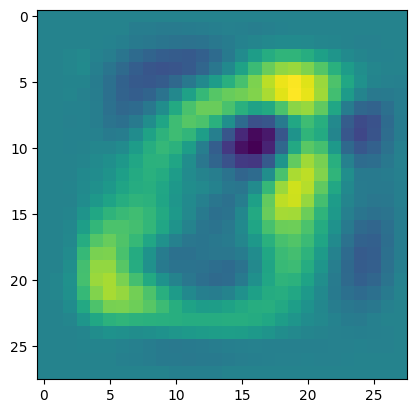

In [131]:
plt.imshow(pca.components_[2, :].reshape(28,28))

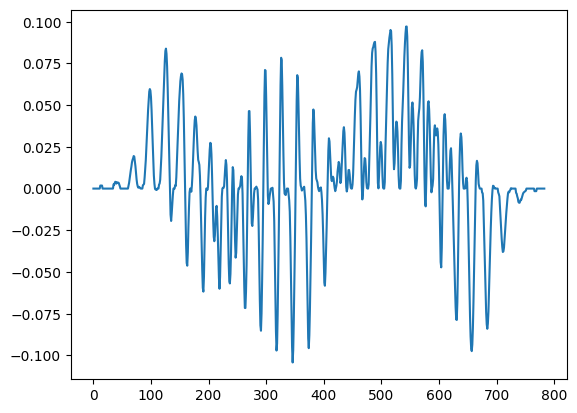

In [129]:
plt.plot(pca.components_[0,:])